# Teleconnections: Global correlation maps with the Nino3.4 index
We have seen in the previous notebook that there is partly no significant correlation between the Nino3.4 index and the averaged gross primary productivity in the amazonian basin or the averaged precipitation pattern in Australia. This may be due to the fact that there is actually only a small correlation between the sizes. 

Questions: 
1. What could be other reasons for it?
2. Why do we use montly and not annual data?

It could be that there is a nonlinear time offset between events. This could not be determined by the pure correlation value. However, the correlation value can also not be significant, since the entire spatial resolution was summarized. Therefore, it can be useful to calculate the individual correlations pixel by pixel and thus preserve the spatial resolution.

### Calculate the Nino3.4 index again

In [1]:
# import modules
import numpy as np
import xarray as xr
import fsspec
import scipy
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load ESDC from SC cluster
ds = xr.open_zarr(fsspec.get_mapper('/work/users/gy963viny/public/EarthSystemDataCube/v2.1.1/esdc-8d-0.25deg-184x90x90-2.1.1.zarr/'), \
                  consolidated=True)

In [3]:
# Computue the average of each month of the SST in the area of Nino3.4
monthly_sst = ds.analysed_sst.sel(lat=slice(5,-5), lon=slice(-170, -120)).resample(time='M').mean()

In [4]:
# Compute the average SST for each month (all januaries, febuaries,...)
average_monthly_sst = ds.analysed_sst.sel(lat=slice(5,-5), lon=slice(-170, -120)).groupby('time.month').mean()

In [5]:
# Determine the difference between average SSTs and SSTs for each month
anomalies = monthly_sst.groupby('time.month') - average_monthly_sst

In [55]:
# Plot the data
# anomalies.plot(x='lon', y='lat', col='time', col_wrap=12, robust=True)

In [6]:
# Calculate the mean of all the Nino3.4 cells (dont forget to weight the grid cells according to their extend)
# You can use the .weighted() function from Xarray (see https://docs.xarray.dev/en/stable/examples/area_weighted_temperature.html)
weights = np.cos(np.deg2rad(anomalies.lat))
weights.name = "weights"

sst_anomaly = anomalies.weighted(weights).mean(('lat', 'lon'))

In [7]:
# There is a rolling window function in Xarray:
sst_anomaly_5month = sst_anomaly.rolling(time=5, center=True).mean()

### Correlate Precipitation Pattern in Australia

In [8]:
# Compute the monthly precipitation for Australia
monthly_precip_australia = ds.precipitation.sel(lat=slice(-10.5, -43.7), lon=slice(110, 155)).resample(time='M').mean()

In [9]:
gpp_sst_cor = xr.corr(
    monthly_precip_australia, sst_anomaly_5month,
    dim = "time"
)

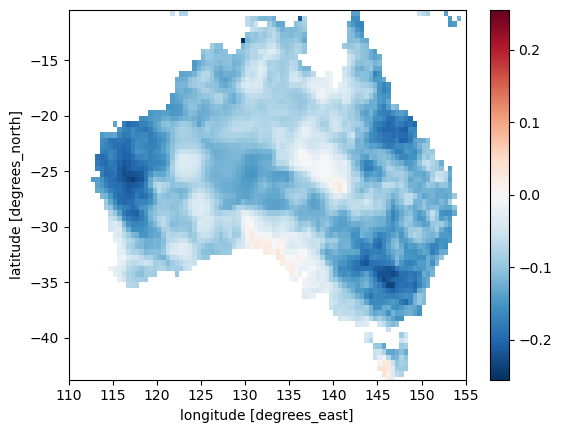

In [10]:
gpp_sst_cor.plot()

### Nino 3.4 index vs Gross Primary Productivity (GPP) South America

In [11]:
# Compute the monthly precipitation for Australia
monthly_gpp_amazon = ds.gross_primary_productivity.sel(lat=slice(7.0, -14.0), lon=slice(-82.0, -47.0)).resample(time='M').mean()

In [12]:
gpp_sst_cor = xr.corr(
    monthly_gpp_amazon, sst_anomaly_5month,
    dim = "time"
)

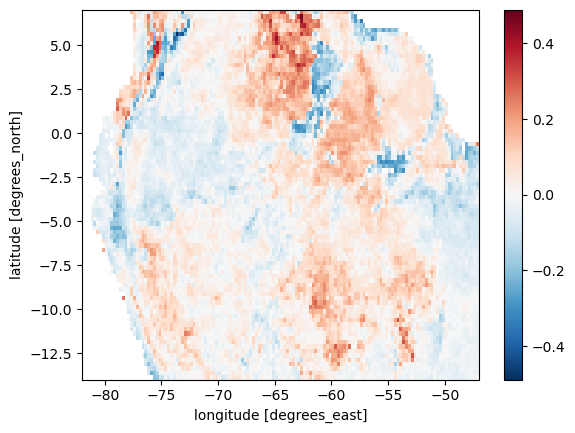

In [13]:
gpp_sst_cor.plot()

## Global maps
### GPP

In [14]:
monthly_gpp = ds.gross_primary_productivity.resample(time='M').mean()

In [ ]:
gpp_sst_cor = xr.corr(
    monthly_gpp, sst_anomaly_5month,
    dim = "time"
)

In [ ]:
gpp_sst_cor.plot()

### Precipitation

In [18]:
monthly_precip = ds.precipitation.resample(time='M').mean()

In [19]:
precip_sst_cor = xr.corr(
    monthly_precip, sst_anomaly_5month,
    dim = "time"
)

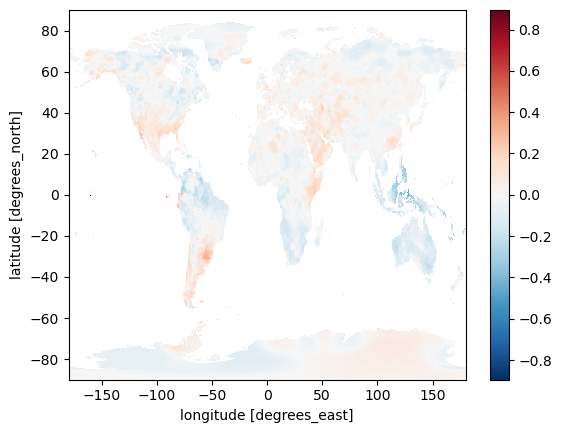

In [20]:
precip_sst_cor.plot()

### Temperature

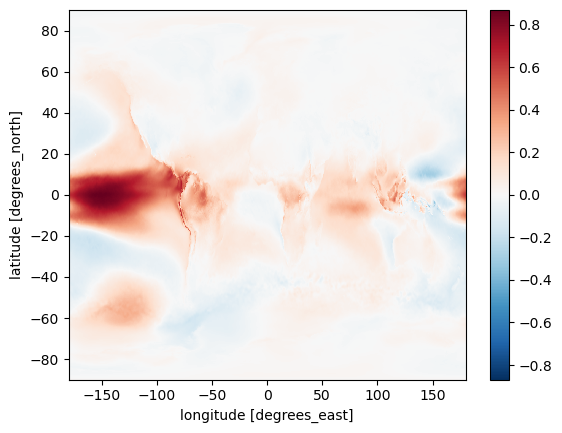

In [21]:
monthly_temp = ds.air_temperature_2m.resample(time='M').mean()
temp_sst_cor = xr.corr(
    monthly_temp, sst_anomaly_5month,
    dim = "time"
)
temp_sst_cor.plot()

### SST


In [ ]:
#monthly_sst = ds.analysed_sst.resample(time='M').mean()
#sst_sst_cor = xr.corr(
#    monthly_sst, sst_anomaly_5month,
#    dim = "time"
#)
#sst_sst_cor.plot()